In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [2]:
nls_emp_survey = pd.read_csv("C:\\Users\\jyoti\\Simon MSBA\\Fall 24\\Fall A\\Analytics Design and Application\\Case 3\\nls_emp_survey.csv")
nls_survey_questions = pd.read_excel("C:\\Users\\jyoti\\Simon MSBA\\Fall 24\\Fall A\\Analytics Design and Application\\Case 3\\nls_survey_questions.xlsx")

In [3]:
nls_emp_survey = nls_emp_survey.set_index('Employee_ID')
nls_emp_survey.head()

,Response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
Employee_ID,,,,,,,,,,,,,
810081,1,6,3,5,4,3,6,5,3,5,4,6,4
512221,2,2,5,3,3,6,2,3,5,3,2,2,3
177541,3,3,2,3,5,2,3,3,2,3,6,3,6
679938,4,3,5,3,3,6,2,2,5,2,2,3,2
777934,5,3,5,3,5,6,4,4,5,4,6,3,5


EDA


In [4]:
nls_emp_survey.describe()

,Response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.200000,3.545000,3.166667,4.566667,3.600000,4.061667,3.985000,3.443333,3.923333,5.236667,3.200000,4.770000
std,173.349358,1.273854,1.543355,0.931129,0.898276,1.792211,1.301545,1.172063,1.313900,1.059557,1.511444,1.273854,1.151511
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000
25%,150.750000,3.000000,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000
50%,300.500000,3.000000,3.000000,3.000000,5.000000,3.000000,4.000000,4.000000,3.000000,4.000000,6.000000,3.000000,5.000000
75%,450.250000,3.000000,5.000000,3.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,3.000000,6.000000
max,600.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000


In [5]:
nls_emp_survey.corr().head()

,Response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
Response,1.000000,-0.036372,0.006873,-0.043047,0.038178,-0.010844,-0.038754,-0.035821,-0.002844,-0.035112,0.051070,-0.036372,0.013072
Q1,-0.036372,1.000000,-0.222819,0.959905,-0.194042,-0.238387,0.442641,0.435857,-0.196697,0.419551,-0.260472,1.000000,-0.208730
Q2,0.006873,-0.222819,1.000000,-0.187616,-0.288164,0.971002,-0.123970,-0.096993,0.973136,-0.079559,-0.279392,-0.222819,-0.278797
Q3,-0.043047,0.959905,-0.187616,1.000000,-0.258810,-0.204082,0.381349,0.375547,-0.161476,0.363249,-0.324633,0.959905,-0.269365
Q4,0.038178,-0.194042,-0.288164,-0.258810,1.000000,-0.274802,0.144268,0.147626,-0.303739,0.177275,0.963449,-0.194042,0.923513


STANDARDIZATION

In [6]:
# select only response columns for PCA
response_columns = nls_emp_survey.columns[1:]
responses = nls_emp_survey[response_columns]
#standarization
scaler = StandardScaler()
respones_scaled = scaler.fit_transform(responses)


In [11]:
#PCA
pca = PCA(n_components = 5)
principal_components = pca.fit(respones_scaled)


In [33]:
#factor loadings 
factorLoadings = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
factorLoadings = factorLoadings.set_index(response_columns)
factorLoadings

,PC1,PC2,PC3,PC4,PC5
Q1,0.377841,-0.224249,-0.115196,0.357202,-0.027824
Q2,-0.253190,-0.276803,0.383411,0.213789,-0.013124
Q3,0.351393,-0.251104,-0.138598,0.356234,0.049858
Q4,0.072333,0.445143,0.198855,0.311536,-0.486822
Q5,-0.260122,-0.267763,0.382000,0.221837,-0.002444
Q6,0.366604,-0.029642,0.343320,-0.282507,0.018812
Q7,0.361852,-0.033165,0.360231,-0.273266,0.029664
Q8,-0.237301,-0.288001,0.393521,0.195376,0.011486
Q9,0.355177,-0.024317,0.375288,-0.250666,-0.055231
Q10,0.043768,0.457583,0.195117,0.284303,-0.310746


In [ ]:
#standardized data * PC loadings 
data_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
data_pca = data_pca.set_index(nls_emp_survey.index)
data_pca 

,PC1,PC2,PC3,PC4,PC5
Employee_ID,,,,,
810081,3.707593,-2.245608,-0.390543,0.515031,-0.005981
512221,-3.160366,-2.834678,-0.666579,-0.723999,0.302930
177541,-0.221119,1.940267,-1.598214,0.489970,0.485333
679938,-3.268003,-3.519573,-1.684326,0.047211,-0.418880
777934,-0.967497,-0.312380,1.651699,0.900330,-0.236715
...,...,...,...,...,...
626499,-0.132733,1.705985,-1.986176,0.105893,-0.218231
781937,-1.131685,-0.491882,1.900333,1.038968,-0.245226
788719,-0.967497,-0.312380,1.651699,0.900330,-0.236715


In [ ]:
#explained variance
explainedVariance = pca.explained_variance_ratio_

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.37229005, 0.68551787, 0.8896999 , 0.97627411, 0.98329698])

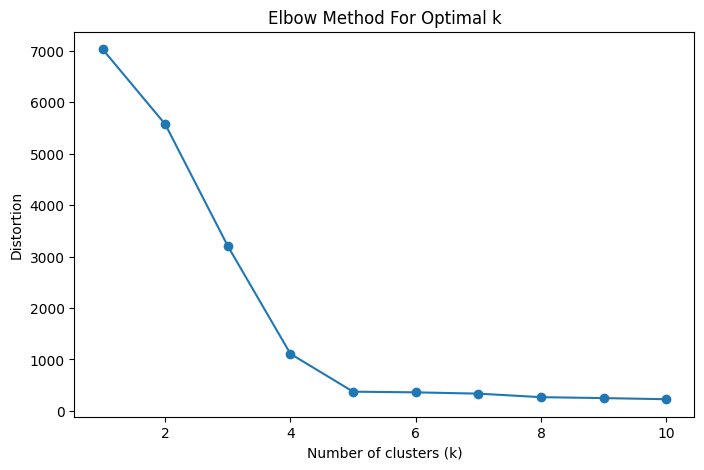

In [39]:
# K means clustering ?

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculating distortions for a range of cluster numbers
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_pca.iloc[:, :-1])  # Exclude 'Location' column for clustering
    distortions.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Assuming k = optimal number of clusters from the elbow method
optimal_k = 4  # Replace with the chosen value
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data_pca['Cluster'] = kmeans.fit_predict(data_pca.iloc[:, :-1])  # Exclude 'Location' column



In [41]:
cluster_means = data_pca.groupby('Cluster').mean()
print(cluster_means)


              PC1       PC2       PC3       PC4       PC5
Cluster                                                  
0       -0.521864  0.471740  1.847328  0.040017 -0.014711
1       -0.022648  1.786986 -1.563080  0.200969 -0.014090
2        3.835531 -2.363906 -0.330290  0.068264  0.025718
3       -3.699924 -3.278670 -1.132007 -0.803201  0.051854


In [45]:
#cluster_location_counts = data_pca.groupby(['Cluster', 'Location']).size().unstack()
#print(cluster_location_counts)


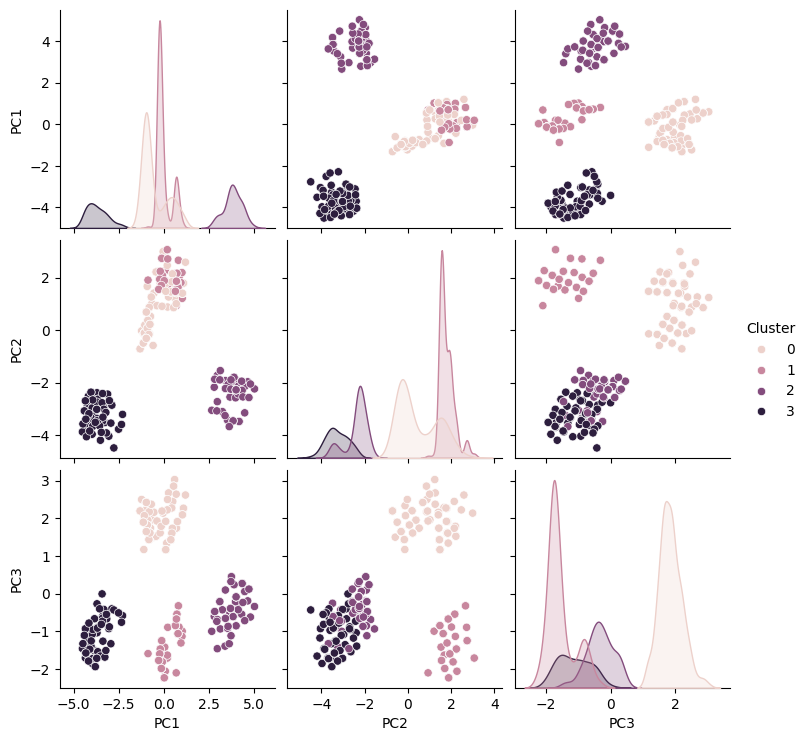

In [44]:
import seaborn as sns

sns.pairplot(data_pca, hue='Cluster', vars=['PC1', 'PC2', 'PC3'])
plt.show()
